# Setup

In [1]:
import os, sys
sys.path.append(os.path.abspath(os.path.join('../../..'))) # access sibling directories

from src.python.metrics import performance_metrics, bootstrapped_metrics
from src.python.helpers import log_with_inf_noise_addition, computation_times
from src.python.visualization import plot_approximations, plot_computation_times

import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Hack to correctly set facecolor to white
# matplotlib 3.5 only sets facecolor if a plot was already created 
_ = plt.figure()
plt.rcParams['figure.facecolor'] = 'w'

<Figure size 432x288 with 0 Axes>

# Load data

In [3]:
comparison_folder = os.path.join(os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd()))),'data', '02_bridge_sampling_comparison', 'nested_models')
bridge_file = '2022_08_10_BF_BS'
NN_fixed_file = '2022_12_14_BF_NN_fixed'
NN_variable_file = '2022_12_14_BF_NN_variable'

bridge = pd.read_csv(os.path.join(comparison_folder, bridge_file), sep = " ").reset_index(drop=True)
NN_fixed = pd.read_csv(os.path.join(comparison_folder, NN_fixed_file))
NN_variable = pd.read_csv(os.path.join(comparison_folder, NN_variable_file))


results_list = [bridge, NN_fixed, NN_variable]

# Calculate performance metrics

In [4]:
n_bootstrap = 100000
names = ['Bridge sampling', 'Fixed network', 'Variable network']
metrics = ['Accuracy', 'ROC AUC', 'MAE', 'RMSE', 'Log score', 'Bias']

# Calculate performance metrics
perf_metrics = performance_metrics(results_list, names=names, metrics=metrics)

# Calculate bootstrapped performance metrics
metrics_means, metrics_ses = bootstrapped_metrics(results_list, 1000, names=names, metrics=metrics)

In [5]:
# Raw results
perf_metrics

,Accuracy,ROC AUC,MAE,RMSE,Log score,Bias
Bridge sampling,0.86,0.9176,0.187240,0.320452,0.317055,-0.017099
Fixed network,0.85,0.9136,0.196363,0.331757,0.332717,-0.024720
Variable network,0.86,0.9168,0.187365,0.320264,0.316651,-0.016005


In [6]:
# Bootstrapped means
metrics_means

,Accuracy,ROC AUC,MAE,RMSE,Log score,Bias
Bridge sampling,0.85953,0.918387,0.186732,0.318208,0.315897,-0.016551
Fixed network,0.85012,0.914335,0.195745,0.329448,0.331321,-0.024088
Variable network,0.85953,0.917535,0.186843,0.318017,0.315487,-0.015452


In [7]:
# Bootstrapped standard errors
metrics_ses

,Accuracy,ROC AUC,MAE,RMSE,Log score,Bias
Bridge sampling,0.035669,0.030974,0.026945,0.035051,0.060020,0.031490
Fixed network,0.036718,0.031151,0.027632,0.034732,0.060113,0.032522
Variable network,0.035669,0.030703,0.026816,0.034940,0.059531,0.031494


In [8]:
# Convert to latex table
metrics_means = metrics_means.round(2).drop('ROC AUC', axis=1) # drop ROC AUC column as results do not add much information
metrics_ses = metrics_ses.round(2).drop('ROC AUC', axis=1) # drop ROC AUC column as results do not add much information

for row in range(metrics_means.shape[0]):
    for col in range(metrics_means.shape[1]):
        metrics_means.iloc[row,col] = f'{metrics_means.iloc[row,col]}' + f' ({metrics_ses.iloc[row,col]})'

print(metrics_means.style.to_latex(position='h', position_float='centering', hrules=True))

\begin{table}[h]
\centering
\begin{tabular}{llllll}
\toprule
 & Accuracy & MAE & RMSE & Log score & Bias \\
\midrule
Bridge sampling & 0.86 (0.04) & 0.19 (0.03) & 0.32 (0.04) & 0.32 (0.06) & -0.02 (0.03) \\
Fixed network & 0.85 (0.04) & 0.2 (0.03) & 0.33 (0.03) & 0.33 (0.06) & -0.02 (0.03) \\
Variable network & 0.86 (0.04) & 0.19 (0.03) & 0.32 (0.03) & 0.32 (0.06) & -0.02 (0.03) \\
\bottomrule
\end{tabular}
\end{table}



In [9]:
# How do the proportions of selected models look like?

print('True proportion = {}'.format(bridge['true_model'].mean()))
print('Bridge Sampling proportion = {}'.format(bridge['selected_model'].mean()))
print('NN fixed proportion = {}'.format(NN_fixed['selected_model'].mean()))
print('NN variable proportion = {}'.format(NN_variable['selected_model'].mean()))

True proportion = 0.5
Bridge Sampling proportion = 0.46
NN fixed proportion = 0.45
NN variable proportion = 0.46


# Plot PMPs & log BFs

In [10]:
# Compute Log BFs

log_bridge_bfs = log_with_inf_noise_addition(bridge)
log_NN_fixed_bfs = log_with_inf_noise_addition(NN_fixed)
log_NN_variable_bfs = log_with_inf_noise_addition(NN_variable)

In [11]:
model_names = ['\mathcal{M}_1', '\mathcal{M}_2']

## BS vs fixed NN

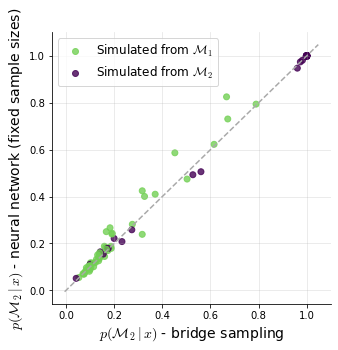

In [12]:
# PMPs
plot_approximations(bridge, NN_fixed, approximated_outcome='PMPs', 
                    NN_name='neural network (fixed sample sizes)', model_names=model_names, save=False)

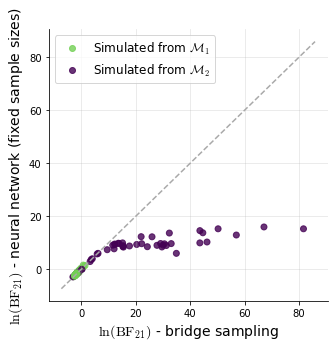

In [26]:
# Log BFs
plot_approximations(bridge, NN_fixed, approximated_outcome='Log BFs', 
                    NN_name='neural network (fixed sample sizes)', model_names=model_names, save=False)

# of included datasets: 73


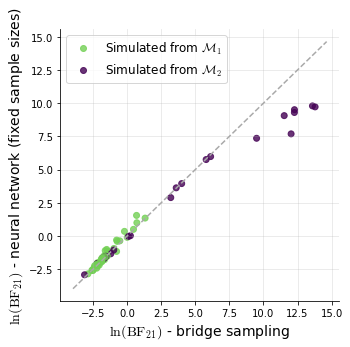

In [14]:
# Log Bfs with filter
filter = bridge['bayes_factor']<1000000
bridge_filtered = bridge[filter].reset_index(drop=True)
NN_fixed_filtered = NN_fixed[filter].reset_index(drop=True)
print('# of included datasets: {}'.format(sum(filter)))

plot_approximations(bridge_filtered, NN_fixed_filtered, approximated_outcome='Log BFs', 
                    NN_name='neural network (fixed sample sizes)', model_names=model_names, save=False)

## BS vs variable NN

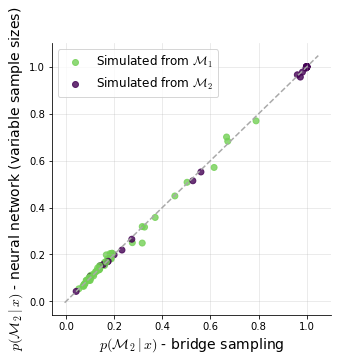

In [15]:
# PMPs
plot_approximations(bridge, NN_variable, approximated_outcome='PMPs', 
                    NN_name='neural network (variable sample sizes)', model_names=model_names, save=False)

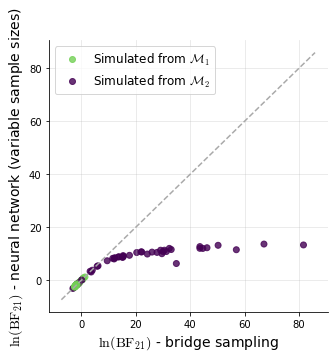

In [27]:
# Log BFs
plot_approximations(bridge, NN_variable, approximated_outcome='Log BFs', 
                    NN_name='neural network (variable sample sizes)', model_names=model_names, save=False)

# of included datasets: 73


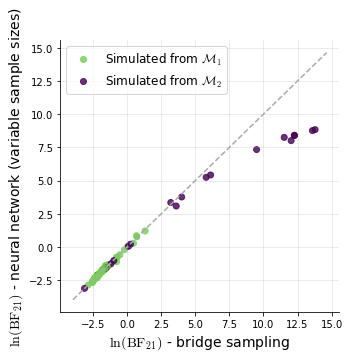

In [17]:
# Log Bfs with filter
filter = bridge['bayes_factor']<1000000
bridge_filtered = bridge[filter].reset_index(drop=True)
NN_variable_filtered = NN_variable[filter].reset_index(drop=True)
print('# of included datasets: {}'.format(sum(filter)))

plot_approximations(bridge_filtered, NN_variable_filtered, approximated_outcome='Log BFs', 
                    NN_name='neural network (variable sample sizes)', model_names=model_names, save=False)

# Plot together for publication

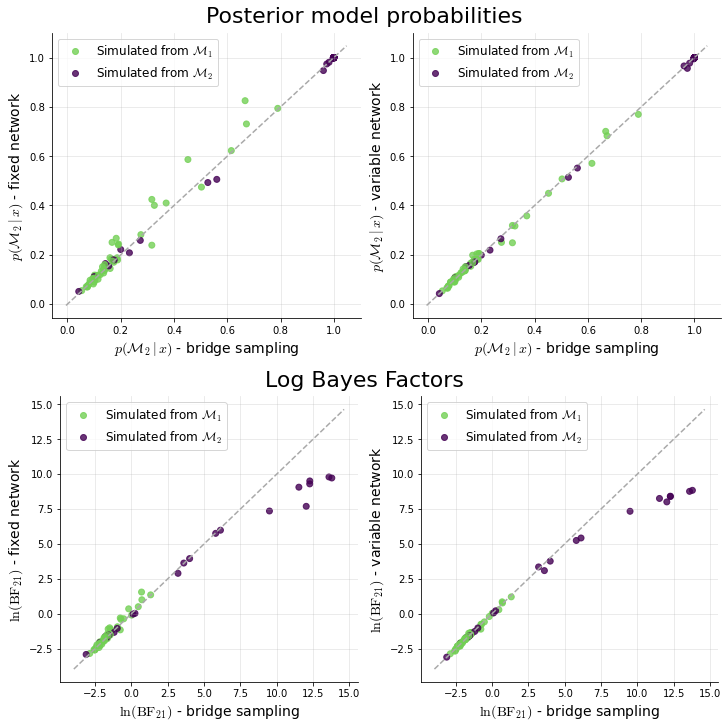

In [18]:
# Plot with PMP/log BF suptitles

fig = plt.figure(constrained_layout=True, figsize=(10, 10))
subfigs = fig.subfigures(nrows=2, ncols=1)
subfigure_titles = ['Posterior model probabilities', 'Log Bayes Factors']

bridge_list = [bridge, bridge_filtered]
NN_fixed_list = [NN_fixed, NN_fixed_filtered]
NN_variable_list = [NN_variable, NN_variable_filtered]

outcomes = ['PMPs', 'Log BFs']

# Use subfig to enable row titles
for row, subfig in enumerate(subfigs):
    subfig.suptitle(subfigure_titles[row], fontsize=22)

    # create 1x2 subplots per subfig
    axs = subfig.subplots(nrows=1, ncols=2)

    plot_approximations(bridge_list[row], NN_fixed_list[row], approximated_outcome=outcomes[row], 
                        NN_name='fixed network', model_names=model_names, ax=axs[0])
    plot_approximations(bridge_list[row], NN_variable_list[row], approximated_outcome=outcomes[row], 
                        NN_name='variable network', model_names=model_names, ax=axs[1])

plt.savefig('bs_comparison_convergence.pdf', dpi=300, bbox_inches='tight')

# Find biggest discrepancies and compare implications

In [19]:
# Find biggest PMP discrepancies
divergence_fixed = np.argmax(abs(bridge["m1_prob"] - NN_fixed["m1_prob"]))
divergence_variable = np.argmax(abs(bridge["m1_prob"] - NN_variable["m1_prob"]))

In [20]:
# Look up respective BFs: Bridge vs. fixed network
print(f'BF Bridge sampling: {bridge.loc[divergence_fixed, "bayes_factor"]}')
print(f'BF NN fixed: {NN_fixed.loc[divergence_fixed, "bayes_factor"]}')

BF Bridge sampling: 2.00251103799196
BF NN fixed: 4.720052109525467


In [21]:
# Look up respective BFs: Bridge vs. variable network
print(f'BF Bridge sampling: {bridge.loc[divergence_variable, "bayes_factor"]}')
print(f'BF NN variable: {NN_variable.loc[divergence_variable, "bayes_factor"]}')

BF Bridge sampling: 0.463582725654334
BF NN variable: 0.331074547605008


# Plot computation times as function of data sets

In [22]:
# Calculate computation times
results_time_list = computation_times(results_list)

In [23]:
# Mean computation times per phase
# Bridge Sampling
print('Stan: {}seconds / {}minutes'.format(round(np.mean(bridge['stan_time']), 2), round((np.mean(bridge['stan_time'])/60), 2)))
print('Bridge: {}seconds / {}minutes'.format(round(np.mean(bridge['bridge_time']), 2), round(np.mean(bridge['bridge_time'])/60), 2))

# NN fixed
print('NN fixed training: {}seconds / {}minutes'.format(round(np.mean(NN_fixed['training_time']), 2), round(np.mean(NN_fixed['training_time'])/60), 2))
print('NN fixed inference: {}seconds'.format(np.mean(NN_fixed['inference_time'])))

# NN variable
print('NN variable training: {}seconds / {}minutes'.format(round(np.mean(NN_variable['training_time']), 2), round(np.mean(NN_variable['training_time'])/60), 2))
print('NN variable inference: {}seconds'.format(np.mean(NN_variable['inference_time'])))

Stan: 43.29seconds / 0.72minutes
Bridge: 29.02seconds / 0minutes
NN fixed training: 745.1seconds / 12minutes
NN fixed inference: 0.0025138789999982seconds
NN variable training: 2912.23seconds / 49minutes
NN variable inference: 0.0031704060000082995seconds


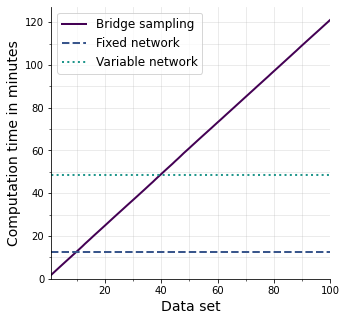

In [24]:
plot_computation_times(results_time_list, names=names, save=True)

In [25]:
# Get minimum number of datasets for which NNs are faster than bridge sampling

print(np.where(results_time_list[0] > results_time_list[1])[0][0]+1) # +1 as numpy uses 0-based indexing
print(np.where(results_time_list[0] > results_time_list[2])[0][0]+1) # +1 as numpy uses 0-based indexing

10
40
